In [18]:
import pandas as pd
from IPython.display import display
from io import StringIO

# CSV data
data = """
Year,Reported,Promise to Marry,FRF,Mistake/Civil,Compounded,Convicted,Completed Trials
2016,38947,10068,2839,249,215,4739,18552
2017,32559,10553,2556,746,110,5822,18099
2018,33356,12568,2875,767,209,4708,17313
2019,32033,16311,3652,622,190,4640,16701
2020,28046,10751,3375,571,103,3814,9713
2021,31677,12951,4009,819,157,3368,11783
2022,31516,14582,4340,1130,558,5067,18517
"""

# Convert CSV data into a pandas DataFrame
csv_data = StringIO(data)
df = pd.read_csv(csv_data)

# Display the DataFrame as a table
display(df)


,Year,Reported,Promise to Marry,FRF,Mistake/Civil,Compounded,Convicted,Completed Trials
0,2016,38947,10068,2839,249,215,4739,18552
1,2017,32559,10553,2556,746,110,5822,18099
2,2018,33356,12568,2875,767,209,4708,17313
3,2019,32033,16311,3652,622,190,4640,16701
4,2020,28046,10751,3375,571,103,3814,9713
5,2021,31677,12951,4009,819,157,3368,11783
6,2022,31516,14582,4340,1130,558,5067,18517


In [19]:
import matplotlib.pyplot as plt

# Function to read data from CSV
def read_data(data):
    """Reads CSV string and returns a DataFrame."""
    csv_data = StringIO(data)
    return pd.read_csv(csv_data)

# Function to calculate total fake cases (FRF + Mistake/Civil)
def calculate_fake_cases(rape_df):
    """Calculates total fake cases for Rape."""
    rape_df['Total_Fake_Cases'] = rape_df['FRF'] + rape_df['Mistake/Civil']
    return rape_df

# Function to calculate total convicted cases
def calculate_convicted_cases(rape_df):
    """Calculates total convicted cases for Rape."""
    rape_df['Total_Convicted'] = rape_df['Convicted']
    return rape_df

# Function to calculate percentage of fake cases out of completed trials
def calculate_fake_percentage(rape_df):
    """Calculates percentage of fake cases out of total completed trials for Rape."""
    rape_df['Fake_Percentage'] = (rape_df['Total_Fake_Cases'] / rape_df['Completed Trials']) * 100
    return rape_df

# Function to calculate percentage of convicted cases out of completed trials
def calculate_convicted_percentage(rape_df):
    """Calculates percentage of convicted cases out of total completed trials for Rape."""
    rape_df['Convicted_Percentage'] = (rape_df['Total_Convicted'] / rape_df['Completed Trials']) * 100
    return rape_df

# Function to calculate fake % out of (fake + convicted cases)
def calculate_fake_out_of_fake_plus_convicted(rape_df):
    """Calculates fake % out of (fake + convicted cases) for Rape."""
    rape_df['Fake_out_of_FakePlusConvicted'] = (rape_df['Total_Fake_Cases'] /
                                                (rape_df['Total_Fake_Cases'] + rape_df['Total_Convicted'])) * 100
    return rape_df

# Function to calculate promise to marry % out of all reported rape cases
def calculate_promise_to_marry_percentage(rape_df):
    """Calculates percentage of rape cases based on false promise to marry out of all reported rape cases."""
    rape_df['Promise_to_Marry_Percentage'] = (rape_df['Promise to Marry'] / rape_df['Reported']) * 100
    return rape_df

# Function to add source info to all graphs
def add_source():
    """Adds source information to the graph."""
    plt.figtext(0.9, 0.02, "Source: NCRB Reports (Crime in India) 2016-22", horizontalalignment='right')

# Function to annotate values on the plot
def annotate_values(x, y, is_percentage=False):
    """Annotates each point with its corresponding value."""
    for (i, j) in zip(x, y):
        value = f"{j:.2f}%" if is_percentage else str(int(j))
        plt.text(i, j - (0.02 * max(y)), value, fontsize=9, ha='center', weight='bold')

# Function to plot the total reported cases
def plot_reported_cases(rape_df):
    """Plots the trend of total reported rape cases."""
    plt.figure(figsize=(8, 5))
    plt.plot(rape_df['Year'], rape_df['Reported'], label='Total Reported Cases', color='b', marker='o')
    plt.xticks(rape_df['Year'])  # Show all years on x-axis
    plt.title('Trend of Total Reported Rape Cases')
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
    plt.grid(True)
    plt.legend()
    annotate_values(rape_df['Year'], rape_df['Reported'])  # Annotate values
    add_source()  # Add source information
    plt.subplots_adjust(top=0.9, bottom=0.15)  # Adjust spacing to add more room
    plt.ylim(rape_df['Reported'].min() * 0.9, rape_df['Reported'].max() * 1.1)  # Increase y-axis padding
    plt.show()

# Function to plot pie chart for percentages for the year 2022
def plot_promise_to_marry_pie(rape_df):
    """Plots pie chart for the percentage of promise to marry cases for the year 2022."""
    total_reported_2022 = rape_df.loc[rape_df['Year'] == 2022, 'Reported'].values[0]
    promise_to_marry_percentage_2022 = rape_df.loc[rape_df['Year'] == 2022, 'Promise to Marry'].values[0]
    percentage = (promise_to_marry_percentage_2022 / total_reported_2022) * 100

    plt.figure(figsize=(8, 5))
    plt.pie([percentage, 100 - percentage],
            labels=['False Promise to Marry', 'Other Rape Cases'],
            autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
    plt.title('2022 Percentage of Rape Cases on False Promise to Marry')
    add_source()  # Add source information
    plt.show()

# Function to plot trend of promise-to-marry percentage
def plot_promise_to_marry_trend(rape_df):
    """Plots the trend of rape cases based on false promise to marry as a percentage of all reported rape cases."""
    plt.figure(figsize=(8, 5))
    plt.plot(rape_df['Year'], rape_df['Promise_to_Marry_Percentage'], label='% False Promise to Marry', color='g', marker='o')
    plt.xticks(rape_df['Year'])  # Show all years on x-axis
    plt.title('Trend of Rape Cases on False Promise to Marry % out of All Reported')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.grid(True)
    plt.legend()
    annotate_values(rape_df['Year'], rape_df['Promise_to_Marry_Percentage'], is_percentage=True)  # Annotate values
    add_source()  # Add source information
    plt.subplots_adjust(top=0.9, bottom=0.15)  # Adjust spacing to add more room
    plt.ylim(rape_df['Promise_to_Marry_Percentage'].min() * 0.9, rape_df['Promise_to_Marry_Percentage'].max() * 1.1)  # Increase y-axis padding
    plt.show()

# Function to plot trends of fake vs convicted cases
def plot_fake_vs_convicted(rape_df):
    """Plots trends of fake vs convicted cases for Rape."""
    plt.figure(figsize=(8, 5))
    plt.plot(rape_df['Year'], rape_df['Total_Fake_Cases'], label='Total Fake Cases', color='r', marker='o')
    plt.plot(rape_df['Year'], rape_df['Total_Convicted'], label='Total Convicted Cases', color='g', marker='o')
    plt.xticks(rape_df['Year'])  # Show all years on x-axis
    plt.title('Trend of Fake vs Convicted Rape Cases')
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
    plt.grid(True)
    plt.legend()
    annotate_values(rape_df['Year'], rape_df['Total_Fake_Cases'])  # Annotate values for fake cases
    annotate_values(rape_df['Year'], rape_df['Total_Convicted'])  # Annotate values for convicted cases
    add_source()  # Add source information
    plt.subplots_adjust(top=0.9, bottom=0.15)  # Adjust spacing to add more room
    min_val = rape_df[['Total_Fake_Cases', 'Total_Convicted']].min().min() * 0.9
    plt.ylim(min_val, rape_df[['Total_Fake_Cases', 'Total_Convicted']].max().max() * 1.1)  # 10% padding below minimum value
    plt.show()

# Function to plot fake % out of (fake + convicted)
def plot_fake_out_of_fake_plus_convicted(rape_df):
    """Plots the trend of fake % out of (fake + convicted cases) for Rape."""
    plt.figure(figsize=(8, 5))
    plt.plot(rape_df['Year'], rape_df['Fake_out_of_FakePlusConvicted'], label='Fake % of (Fake + Convicted)', color='b', marker='o')
    plt.xticks(rape_df['Year'])  # Show all years on x-axis
    plt.title('Trend of Fake % out of (Fake + Convicted)')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.grid(True)
    plt.legend()
    annotate_values(rape_df['Year'], rape_df['Fake_out_of_FakePlusConvicted'], is_percentage=True)  # Annotate values
    add_source()  # Add source information
    plt.subplots_adjust(top=0.9, bottom=0.15)  # Adjust spacing to add more room
    min_val = rape_df['Fake_out_of_FakePlusConvicted'].min() * 0.9
    plt.ylim(min_val, rape_df['Fake_out_of_FakePlusConvicted'].max() * 1.1)  # 10% padding below minimum value
    plt.show()

# Function to plot fake and convicted percentages
def plot_fake_and_convicted_percentage(rape_df):
    """Plots fake and convicted percentages out of completed trials."""
    plt.figure(figsize=(8, 5))
    plt.plot(rape_df['Year'], rape_df['Fake_Percentage'], label='Fake % of Completed Trials', color='r', marker='o')
    plt.plot(rape_df['Year'], rape_df['Convicted_Percentage'], label='Convicted % of Completed Trials', color='g', marker='o')
    plt.xticks(rape_df['Year'])  # Show all years on x-axis
    plt.title('Trend of Fake % vs Convicted % of Completed Trials')
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.grid(True)
    plt.legend()
    annotate_values(rape_df['Year'], rape_df['Fake_Percentage'], is_percentage=True)  # Annotate values for fake percentage
    annotate_values(rape_df['Year'], rape_df['Convicted_Percentage'], is_percentage=True)  # Annotate values for convicted percentage
    add_source()  # Add source information
    plt.subplots_adjust(top=0.9, bottom=0.15)  # Adjust spacing to add more room
    min_val = rape_df[['Fake_Percentage', 'Convicted_Percentage']].min().min() * 0.9
    plt.ylim(min_val, rape_df[['Fake_Percentage', 'Convicted_Percentage']].max().max() * 1.1)  # 10% padding below minimum value
    plt.show()

# Function to plot pie chart for fake % out of (fake + convicted) for the year 2022
def plot_fake_out_of_fake_plus_convicted_pie(rape_df):
    """Plots pie chart for the percentage of fake cases out of (fake + convicted) for the year 2022."""
    fake_cases_2022 = rape_df.loc[rape_df['Year'] == 2022, 'Total_Fake_Cases'].values[0]
    convicted_cases_2022 = rape_df.loc[rape_df['Year'] == 2022, 'Total_Convicted'].values[0]

    plt.figure(figsize=(8, 5))
    plt.pie([fake_cases_2022, convicted_cases_2022],
            labels=['Fake Cases', 'Convicted Cases'],
            autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightyellow'])
    plt.title('2022 Percentage of Fake Cases out of (Fake + Convicted)')
    add_source()  # Add source information
    plt.show()

In [20]:
# Read data from CSV -- refer Block 1
rape_df = read_data(data)

# Calculate various statistics
rape_df = calculate_fake_cases(rape_df)
rape_df = calculate_convicted_cases(rape_df)
rape_df = calculate_fake_percentage(rape_df)
rape_df = calculate_convicted_percentage(rape_df)
rape_df = calculate_fake_out_of_fake_plus_convicted(rape_df)
rape_df = calculate_promise_to_marry_percentage(rape_df)

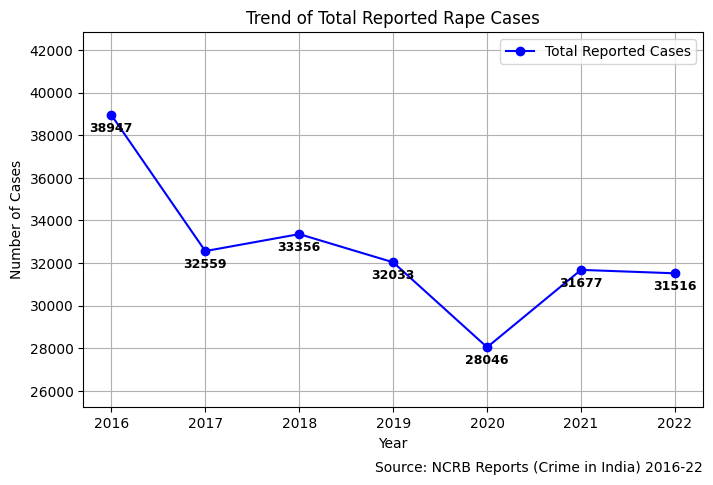

In [21]:
plot_reported_cases(rape_df)

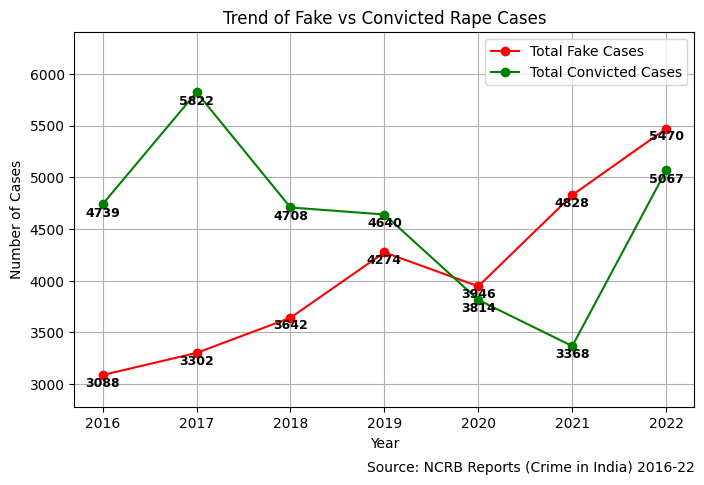

In [22]:
plot_fake_vs_convicted(rape_df)

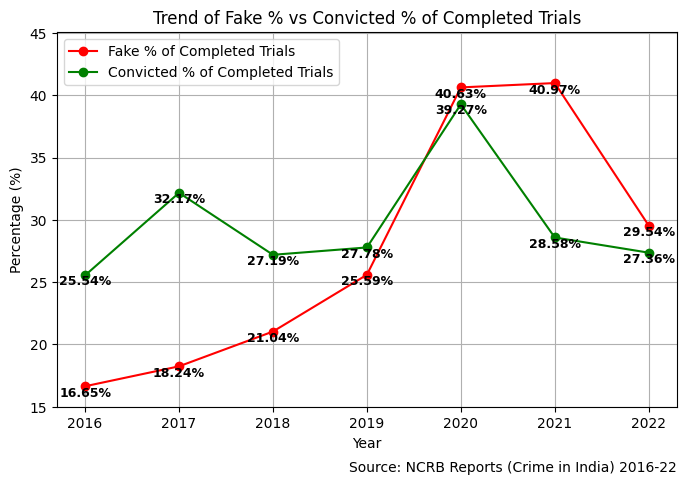

In [23]:
plot_fake_and_convicted_percentage(rape_df)

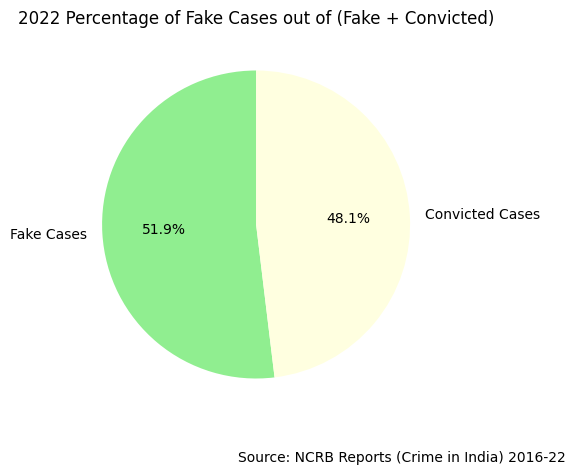

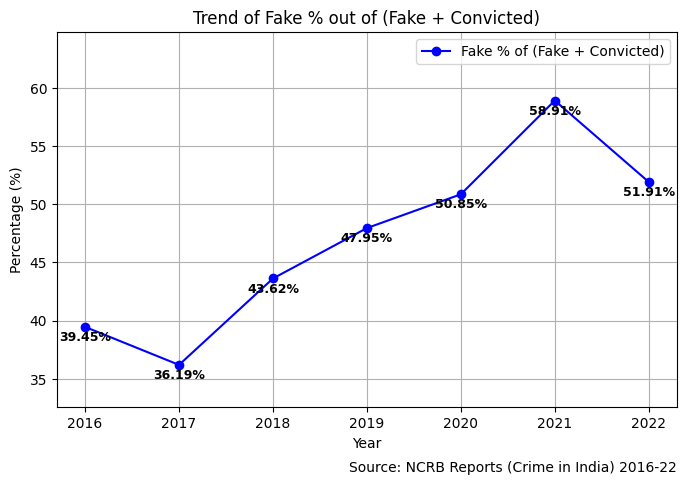

In [24]:
# Fake to convicted ratio
plot_fake_out_of_fake_plus_convicted_pie(rape_df)
plot_fake_out_of_fake_plus_convicted(rape_df)

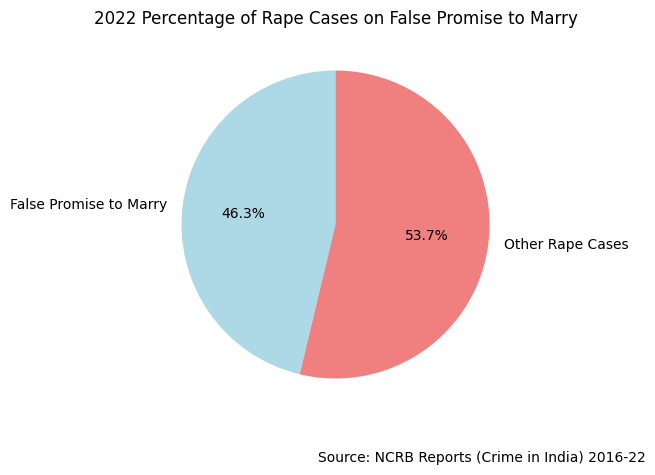

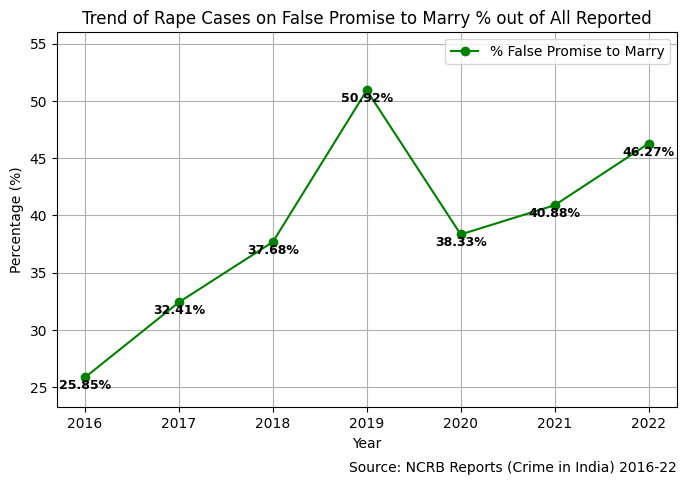

In [16]:
#Rape on False promise to marry
plot_promise_to_marry_pie(rape_df)
plot_promise_to_marry_trend(rape_df)